<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/13_Business_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Installation: pandas, yfinance, matplotlib, numpy

In [ ]:
pip install pandas yfinance matplotlib numpy

# Data frame



In [ ]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

# Descargar los datos utilizando el método .download()
raw_data = yf.download(tickers="^GSPC ^FTSE ^N225 ^GDAXI", start="1994-01-07", end="2023-09-23", interval="1d", group_by='ticker', auto_adjust=True, threads=True)

# Crear una copia de respaldo en caso de que se necesite
df_comp = raw_data.copy()

# Agregar nuevas columnas al conjunto de datos
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close

# Eliminar la primera fila si es necesario (ajustar a tus requisitos)
# df_comp = df_comp.iloc[1:]

# Eliminar los tickers originales del conjunto de datos
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']

# Establecer la frecuencia de los datos a días hábiles
df_comp = df_comp.asfreq('B')

# Rellenar valores faltantes hacia adelante
df_comp = df_comp.fillna(method='ffill')
# Restablecer el índice para que "Date" sea una columna
df_comp = df_comp.reset_index()

print(df_comp.head()) # Mostrar las primeras 5 filas para verificar la descarga
print(df_comp.tail()) # Verificar la última fecha en la serie

from google.colab import drive
drive.mount('/content/drive')

# Supongamos que ya tienes un DataFrame llamado 'df_comp' con tus datos

# Especifica el nombre del archivo CSV
nombre_archivo_csv = "Index_2023.csv"  # Reemplaza 'tu_archivo.csv' con el nombre que desees

# Guarda el DataFrame en un archivo CSV en Google Colab
df_comp.to_csv("Index_2023.csv", index=True)

# Mueve el archivo CSV a tu unidad de Google Drive
import shutil
ruta_destino_drive = "/content/drive/My Drive/" + "Index_2023.csv"
shutil.move("Index_2023.csv", ruta_destino_drive)

# Asegúrate de que los datos se hayan guardado en Google Drive
print(f"Los datos se han guardado en Google Drive en {ruta_destino_drive}.")

[*********************100%%**********************]  4 of 4 completed
        Date         spx          dax         ftse        nikkei
                                                                
0 1994-01-07  469.899994  2224.949951  3446.000000  18124.009766
1 1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
2 1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
3 1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
4 1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
           Date          spx           dax         ftse        nikkei
                                                                     
7746 2023-09-18  4453.529785  15727.120117  7652.899902  33533.089844
7747 2023-09-19  4443.950195  15664.480469  7660.200195  33242.589844
7748 2023-09-20  4402.200195  15781.589844  7731.700195  33023.781250
7749 2023-09-21  4330.000000  15571.860352  7678.600098  32571.029297
7750 2023-09-22  4320.060059  15557.290039  7683.899902 

#Package Installation: statsmodels, seaborn, arch

In [ ]:
!pip install statsmodels seaborn arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 11.5 MB/s eta 0:00:00


#Package Installation: pmdarima

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00


# Importing the Packages

In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Importing the Data

In [ ]:
raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True, threads = True)

[*********************100%%**********************]  3 of 3 completed


In [ ]:
df = raw_data.copy()

# Defining Key Dates

Pre-processing the Data

In [ ]:
# Starting Date
start_date = "2009-04-05"

# First Official Announcement - 49.9%
ann_1 = "2009-12-09"

# Second Official Announcement - 51.1%
ann_2 = "2012-07-05"

#Ending Date
end_date = "2014-01-01"

# Dieselgate
d_gate = '2015-09-20'

# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

Plotting the Prices

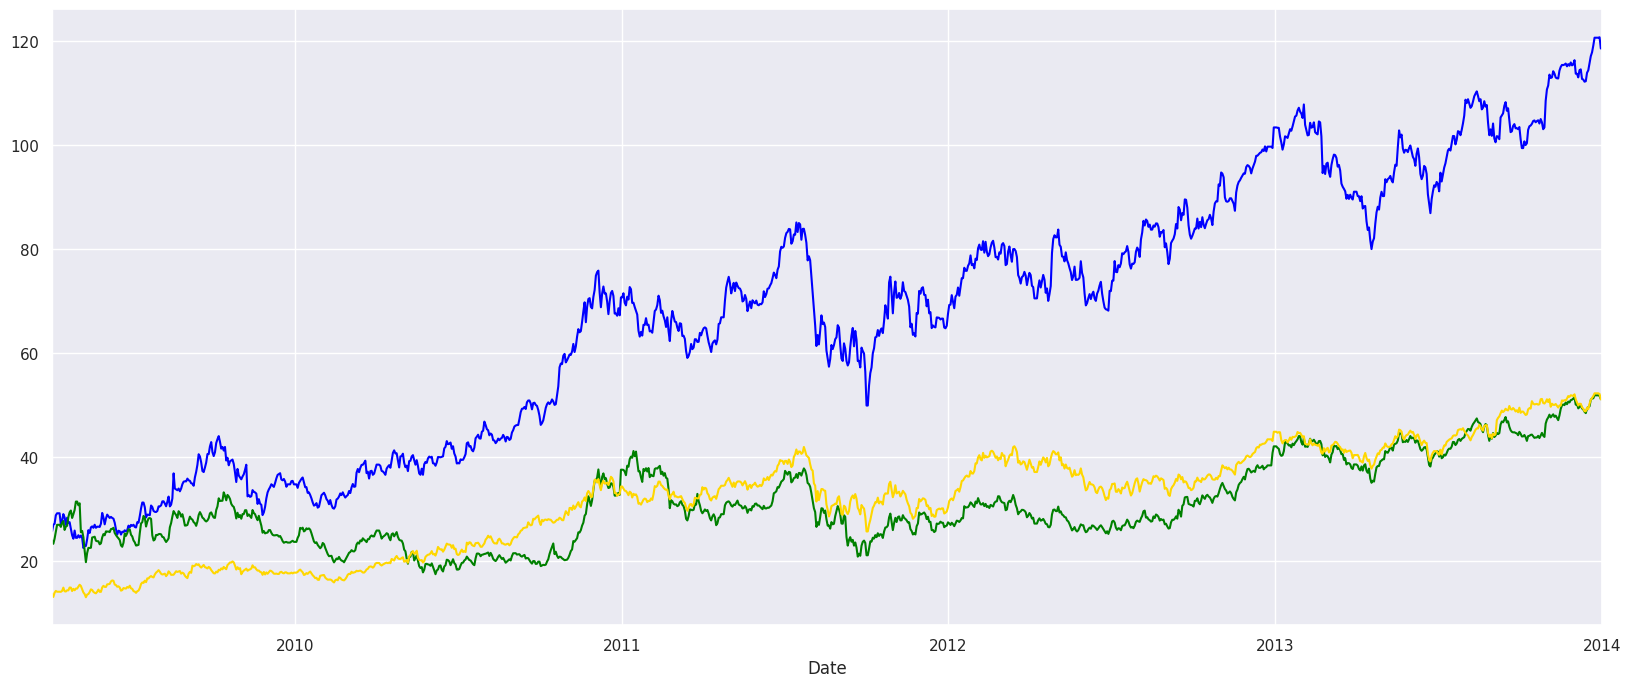

In [ ]:
df['vol'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.show()

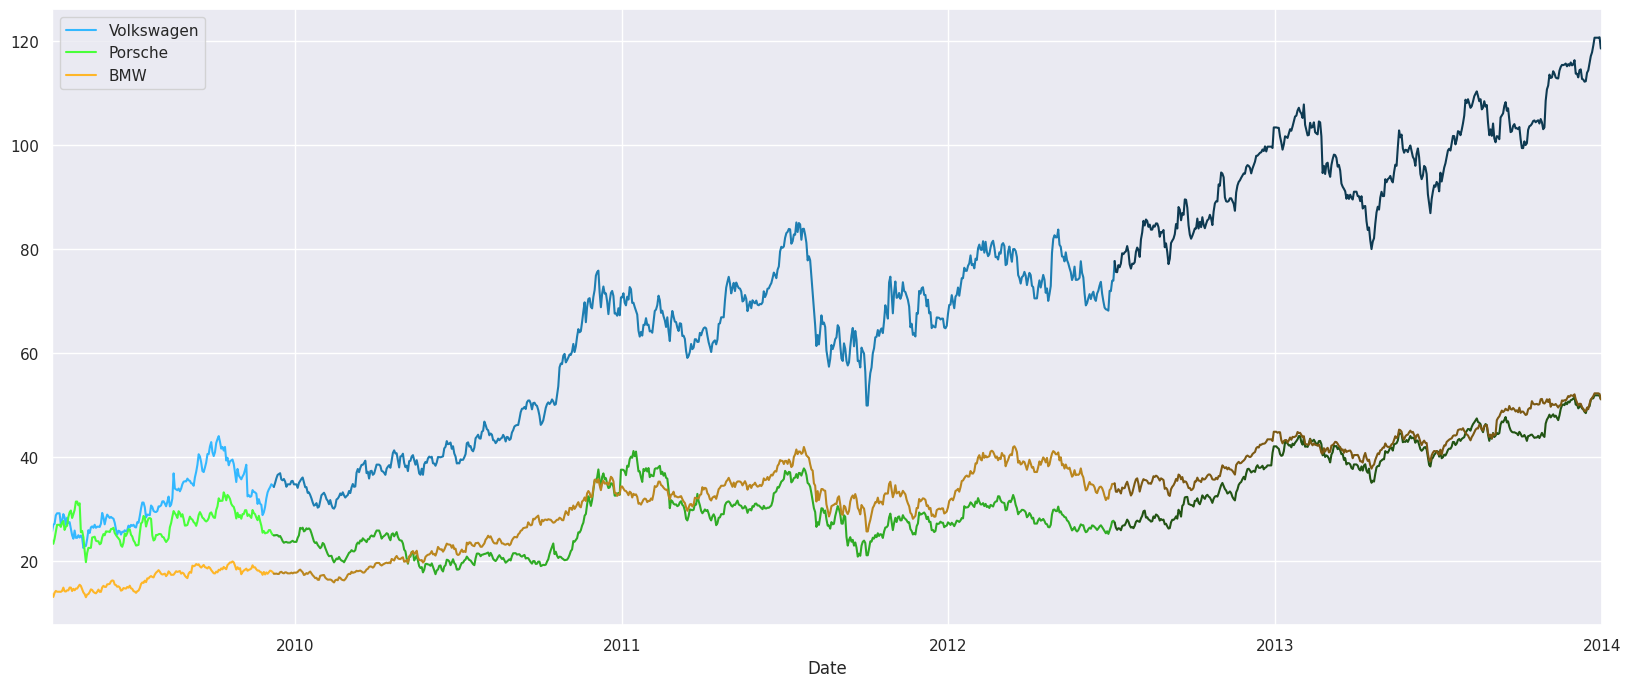

In [ ]:
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

# Correlation

In [ ]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1])+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.8359547075391072
Volkswagen and BMW correlation: 	0.9799378241701046
Porsche and BMW correlation: 		0.8052157883295588
Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633585334931495
Volkswagen and BMW correlation: 	0.8427607133632249
Porsche and BMW correlation: 		0.6095038033736964
Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7428267721828089
Volkswagen and BMW correlation: 	0.9795943095125204
Porsche and BMW correlation: 		0.7042723354716658
Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.9405237381347457
Volkswagen and BMW correlation: 	0.928444694969582
Porsche and BMW correlation: 		0.9494111629791107
Correlation among manufacturers from 2014-01-01 to 2023-10-13 00:00:00

Volkswagen and Porsche correlation: 	0.874543

# Best Fitting Models

For Volkswagen

In [ ]:
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[['por','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_pre_vol.summary()

mod_pr_btn_vol.summary()

mod_pr_post_vol.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -690.500
Date:                Sat, 14 Oct 2023   AIC                           1384.999
Time:                        19:14:04   BIC                           1392.926
Sample:                    07-05-2012   HQIC                          1388.142
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0879      0.047      1.861      0.063      -0.005       0.180
sigma2         2.0385      0.106     19.175      0.000       1.830       2.247
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                61.79
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.15
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

For Porsche

In [ ]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[['vol','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[['vol','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[['vol','bmw']][ann_2:end_date],
                             m = 5, max_p = 5, max_q = 5)
mod_pr_pre_por.summary()

mod_pr_btn_por.summary()

mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -388.989
Date:                Sat, 14 Oct 2023   AIC                            781.977
Time:                        19:15:55   BIC                            789.904
Sample:                    07-05-2012   HQIC                           785.120
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0610      0.033      1.824      0.068      -0.005       0.127
sigma2         0.4326      0.024     17.659      0.000       0.385       0.481
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                25.52
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.14
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for the Future

For Porsche

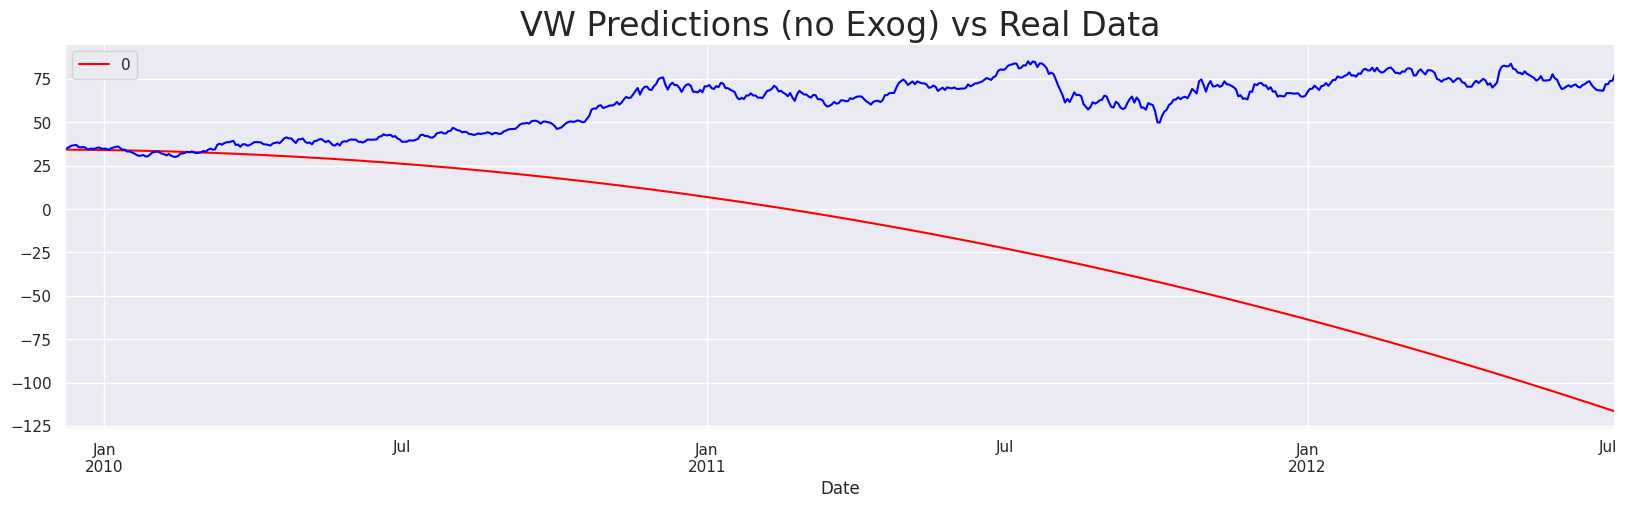

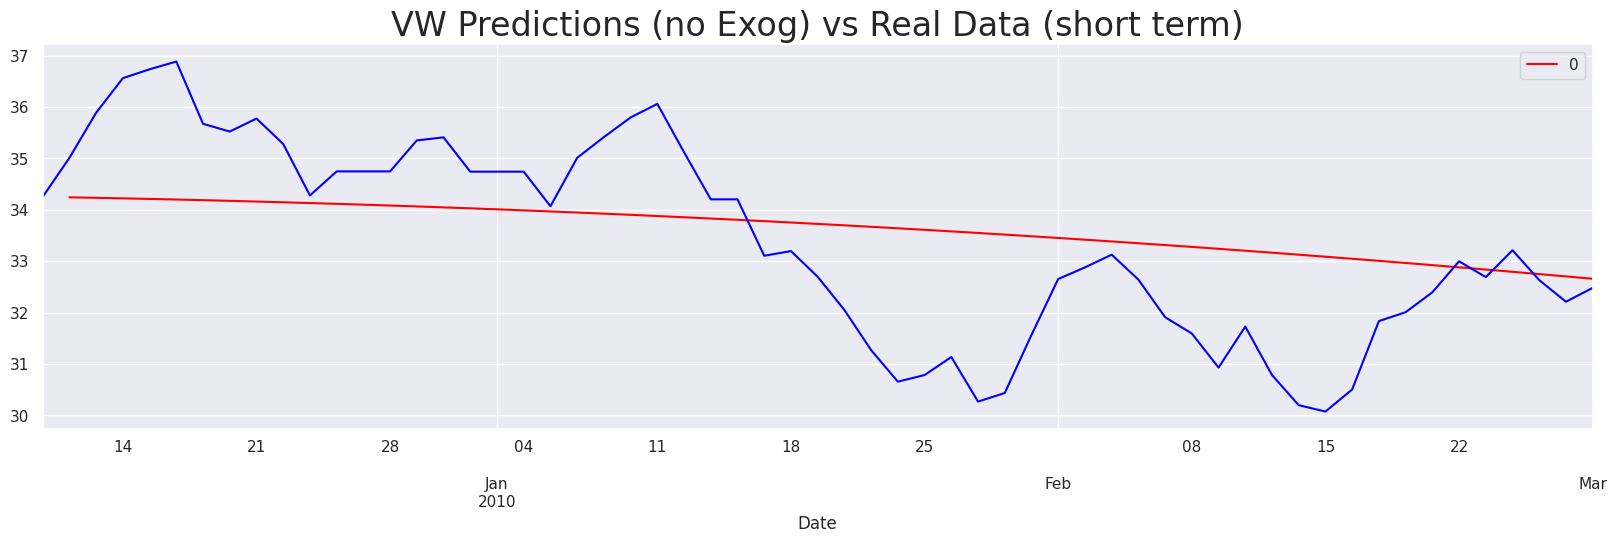

In [ ]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)
plt.show()

df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

For Volkswagen

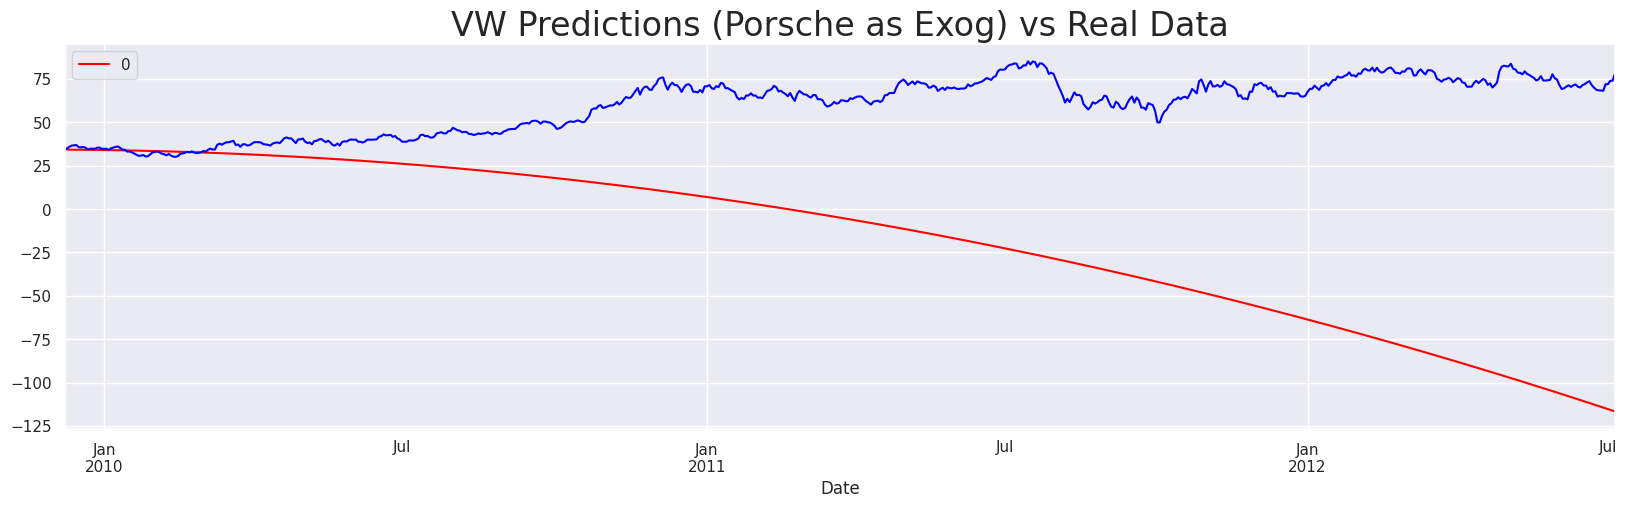

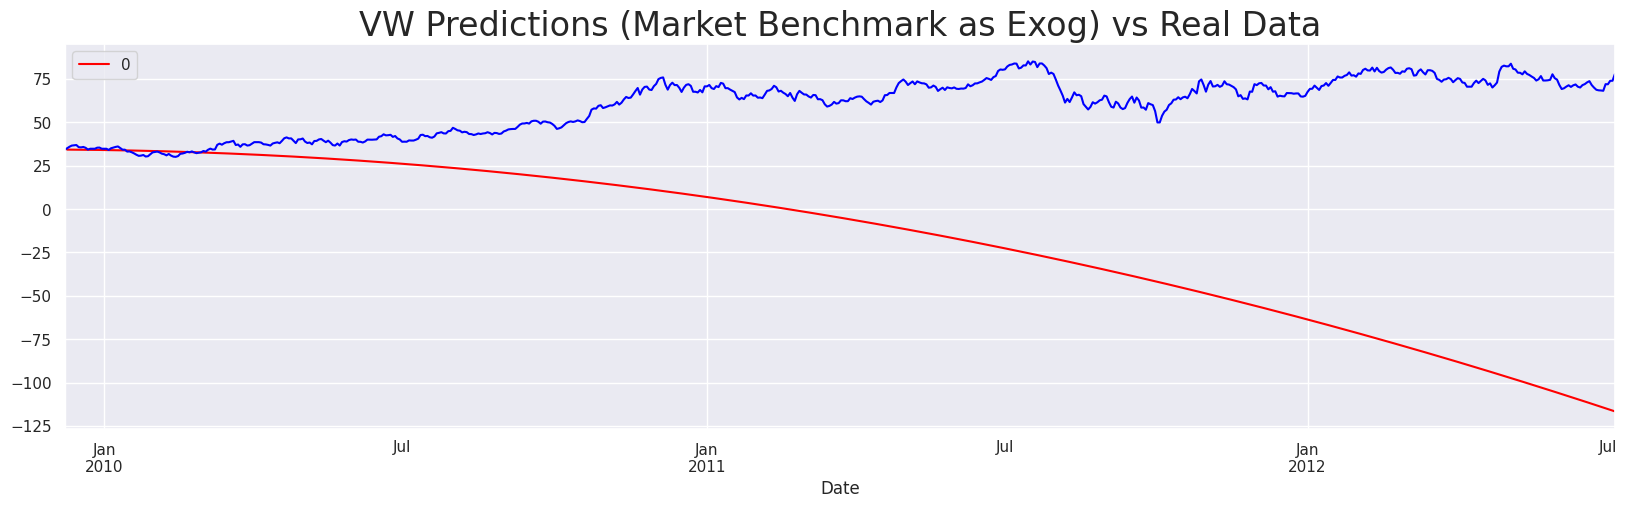

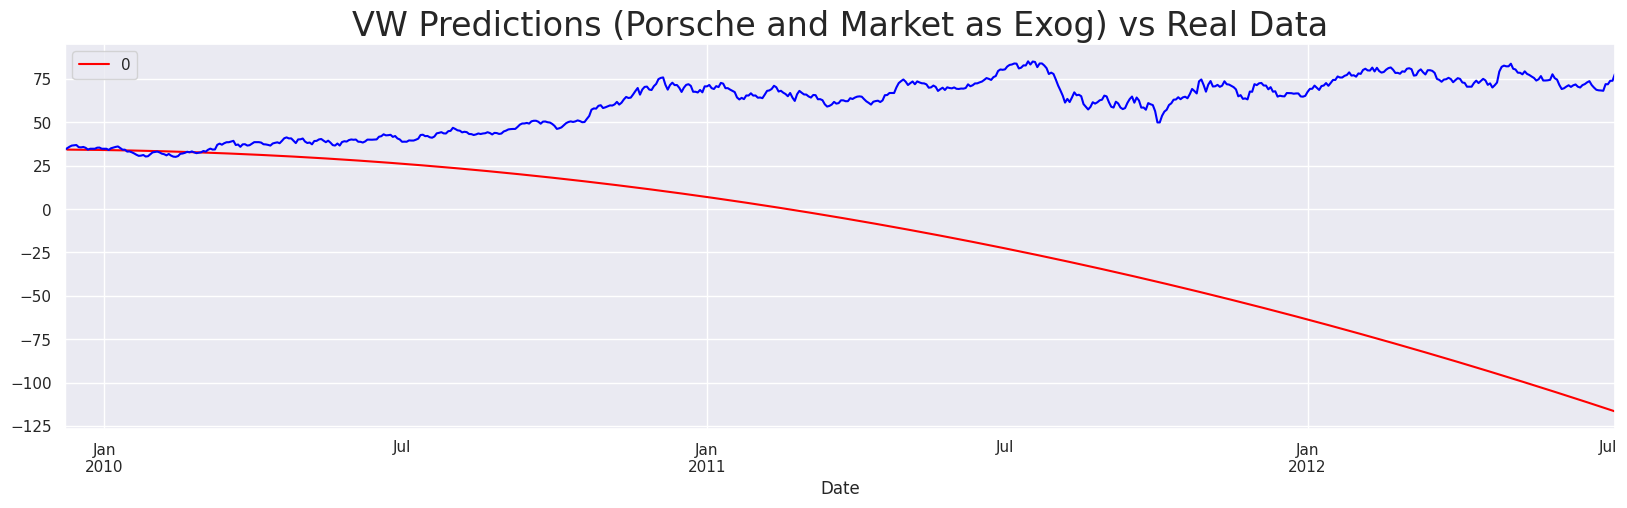

In [ ]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size = 24)
plt.show()

model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size = 24)
plt.show()



# Volatility

Volatility of VW for Each Period

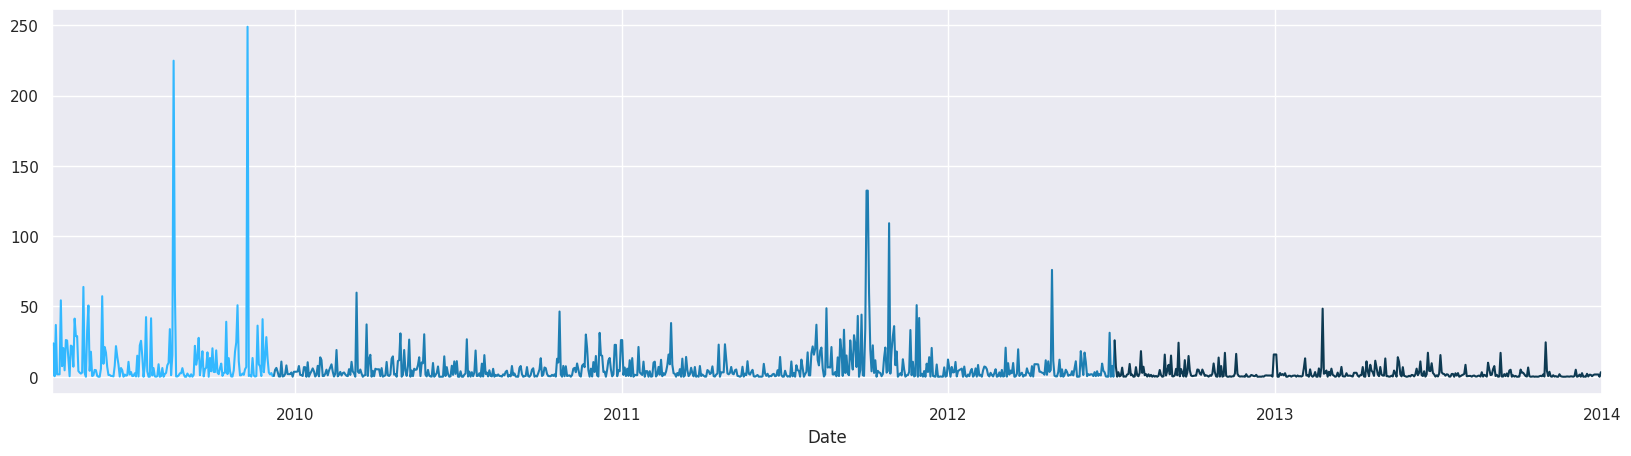

In [ ]:
df['sq_vol'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_vol'][ann_2:end_date].plot(color = "#0E3A52")
plt.show()

Volatility Trends for Each Period

In [ ]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

results_garch_pre.summary()

results_garch_post.summary()



Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.7775220023249
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.0031334079716
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.9904880100935
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.99048795780186
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.7533841502354
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7314528424029
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.7314528411587
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     34,   Neg. LLF: 724.5623227876451
Optimization terminated successfully    (Exit mode 0)
            Current function value: 724.5579689352514
            Iterations: 7
            

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -724.558
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Sat, Oct 14 2023   Df Residuals:                      389
Time:                        19:27:01   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.845e-02      2.334  1.958e-02 [3.685e-02,  0.423]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7719      0.677      1.141      0.254    [ -0.554,  2.098]
alpha[1]       0.1853      0.145      1.273      0.203 [-9.991e-02,  0.470]
beta[1]        0.5136      0.331      1.550      0.121    [ -0.136,  1.163]
===========================================================================

Covariance estimator: robust
"""